In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
df = pd.read_excel("../../abdias_suez/CFD_Jung.xlsx", sheet_name='Ganho')
df = df.iloc[:,:47]
df.head(-5)

,Ângulo,Calado,Rotação,Vw,Vw kns,Lift_popa_bom,Lift_popa_bor,Lift_proa_bom,Lift_proa_bor,Drag_popa_bom,...,P_CO,P_SF,P,Ganho (ITTC),"P_prop,on",P_rotor kW,P_E (cla),Ganho (cla),Net Fuel Saving of WAPS (t/day),Net GHG reduction of WAPS (t/day)
0,0,8.5,100,6,11.664075,20.489260,21.494756,20.634054,21.058877,9.136528,...,153.817365,23.347231,-465.619028,-0.070978,6199.905993,112.379811,6312.285804,0.037765,-2.011474,-6.263731
1,0,8.5,100,10,19.440124,64.358168,51.751352,37.885730,54.061607,19.469669,...,249.324448,219.336109,-972.402551,-0.148232,5619.454504,111.794156,5731.248660,0.126337,-4.200779,-13.081226
2,0,8.5,100,12,23.328149,80.261000,71.552000,52.481000,73.515000,20.251000,...,308.436726,345.416438,-1171.966482,-0.178653,5447.951662,116.587994,5564.539656,0.151750,-5.062895,-15.765856
3,0,8.5,180,6,11.664075,14.845000,15.679000,22.501000,17.440000,7.769000,...,734.573557,24.878978,-1131.100854,-0.172423,6273.008130,664.069855,6937.077986,-0.057478,-4.886356,-15.216112
4,0,8.5,180,10,19.440124,54.210000,52.670000,35.640000,53.740000,20.360000,...,1092.599582,152.333089,-1800.076250,-0.274401,5552.536658,613.927709,6166.464367,0.059994,-7.776329,-24.215490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,330,8.5,100,12,23.328149,69.670000,33.470000,70.820000,44.040000,87.630000,...,45.757224,273.846520,1846.280486,0.281444,3778.851333,110.572426,3889.423759,0.407102,7.975932,24.837051
135,330,8.5,180,6,11.664075,9.977000,10.295000,12.466000,7.273000,20.837000,...,239.970659,8.276285,-3.240587,-0.000494,5934.092423,656.592865,6590.685288,-0.004674,-0.013999,-0.043594
136,330,8.5,180,10,19.440124,43.590000,15.760000,55.670000,25.640000,67.880000,...,250.772063,166.484020,914.344830,0.139381,4286.210704,659.143372,4945.354076,0.246138,3.949970,12.300206
137,330,8.5,180,12,23.328149,67.890000,35.380000,79.880000,39.370000,108.730000,...,220.518943,342.970222,1370.903962,0.208979,3063.715379,586.304965,3650.020344,0.443596,5.922305,18.442058


In [72]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_hist(df, marker='Ganho'):
    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.hist(df[marker], bins=50)
    ax.set_xlabel(marker)
    ax.set_ylabel("Frequence")
    ax.set_title(f'Histogram of {marker}')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xticks(np.arange(np.round(df[marker].min()-0.1, 1), np.round(df[marker].max()+0.1, 1), 0.1))
    fig.tight_layout()
    fig.savefig(f'Histogram {marker.split()[0]}.png')

def plot_data(df, marker='Ganho'):
    fig, ax = plt.subplots(2, figsize=(12, 8))
    angs = np.arange(0, 360, 30)
    vels = [6, 10, 12]
    drafts = [8.5, 16]
    rots = [100, 180]
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
    for i, draft in enumerate(drafts):
        j = 0
        for vel in vels:
            for rot in rots:
                df_angle = df[
                    (df['Calado'] == draft) &
                    (df['Vw'] == vel) &
                    (df['Rotação'] == rot)                 
                ]
                
                if not df_angle.empty:
                    df_angle = df_angle.sort_values('Ângulo')
                    ax[i].plot(df_angle['Ângulo'], 100*df_angle[marker], 
                        marker='o', linewidth=2, markersize=6, 
                        color=colors[j], markerfacecolor=colors[j], markeredgecolor=colors[j])
                j+=1
        
        ax[i].set_xlabel('Ângulo')
        ax[i].set_ylabel(marker)
        ax[i].set_title(f'{marker} for Vw={vel} m/s, Draft={draft} m, Rotation={rot} rpm')
        ax[i].set_xticks(angs)
        ax[i].grid(True, alpha=0.3, linestyle='--')
    fig.tight_layout()
    fig.savefig(f'{marker.split()[0]}.png')

    return

#### Calculo economia combustível (Cla)

In [63]:
P_0 = 6560 # kW
fuew_energy = 180 # g/kWh
GHG = 3.114 # TeqCO2 / Tfuel

df['Net Fuel Saving of WAPS (t/day) (cla)'] = 24*df['Ganho (cla)']*P_0/1000000
df['Net GHG reduction of WAPS (t/day) (cla)'] = df['Net Fuel Saving of WAPS (t/day) (cla)']*GHG



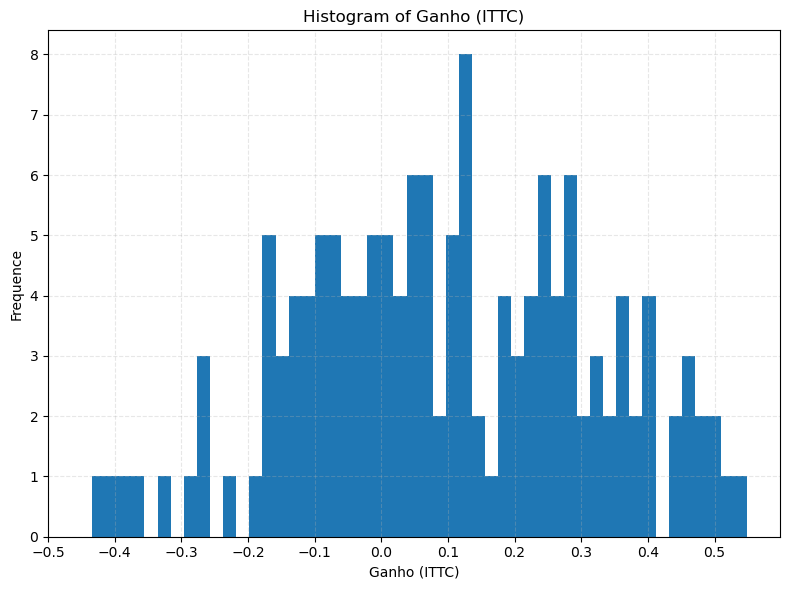

In [74]:
plot_hist(df, 
    marker = 'Ganho (ITTC)'
    )

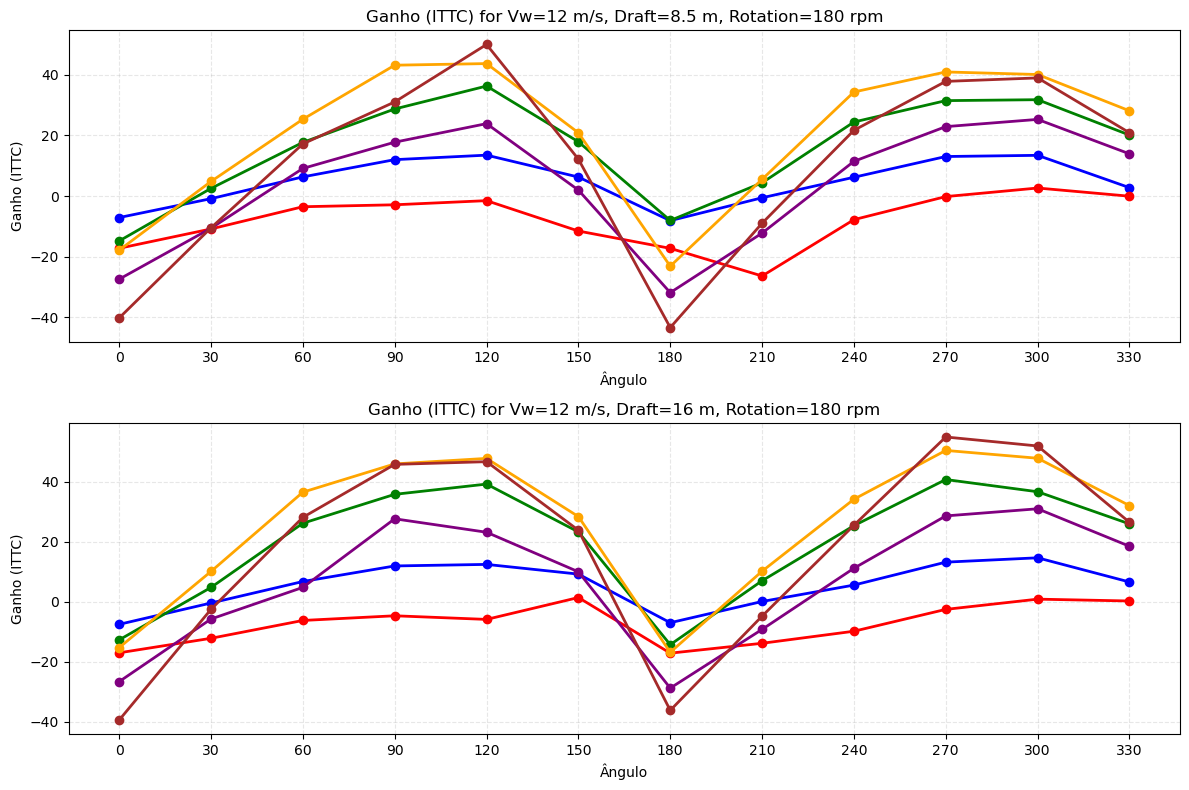

In [75]:
plot_data(df, 
    marker = 'Ganho (ITTC)'
    )